In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import the libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from pathlib import Path


In [27]:
MODELS_DIR = Path("models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/LinkScribe.pk")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)


Read the data

In [28]:
df = pd.read_csv('/Users/mac/Documents/uaoproyecto/my-first-project/backend/website_classification.csv')

In [29]:
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [30]:
len(df)

1408

## Check for missing values

In [31]:
df.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [32]:
df['Category'].value_counts()

Category
Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: count, dtype: int64

## Visualize the classification categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Travel'),
  Text(1, 0, 'Social Networking and Messaging'),
  Text(2, 0, 'News'),
  Text(3, 0, 'Streaming Services'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Photography'),
  Text(6, 0, 'Law and Government'),
  Text(7, 0, 'Health and Fitness'),
  Text(8, 0, 'Games'),
  Text(9, 0, 'E-Commerce'),
  Text(10, 0, 'Forums'),
  Text(11, 0, 'Food'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Computers and Technology'),
  Text(14, 0, 'Business/Corporate'),
  Text(15, 0, 'Adult')])

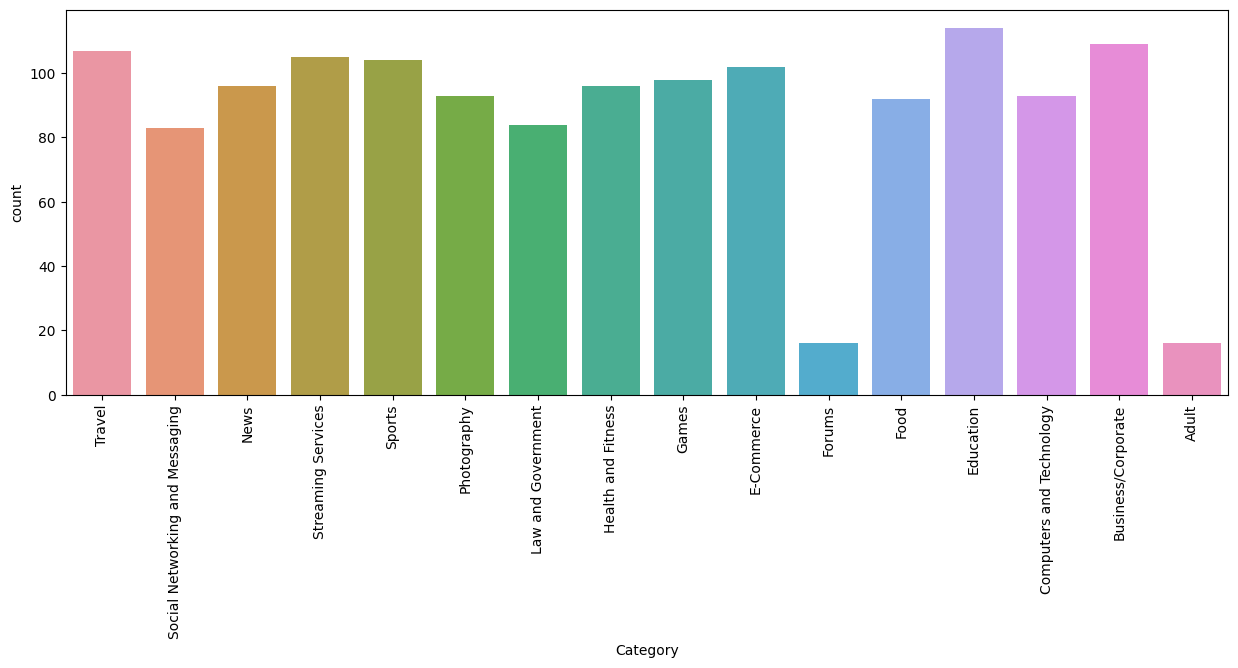

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Category', data=df)
plt.xticks(rotation = 90)

## Create the Data

In [34]:
X = df['cleaned_website_text']

In [35]:
y = df['Category']

## Label Encode the data

In [36]:
le = LabelEncoder()

In [37]:
le.fit(y)

LabelEncoder()

In [38]:
le.classes_

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)

In [39]:
y = le.transform(y)

In [40]:
y

array([15, 15, 15, ...,  0,  0,  0])

## Split the dataset into train and test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Create classifier pipeline

In [42]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

/Users/mac/Documents/uaoproyecto/my-first-project/backend/.venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Prediction

In [43]:
predictions = text_clf.predict(X_test)

In [44]:
print(confusion_matrix(y_test, predictions))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 35  1  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1 22  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  1  0  0 43  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 30  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1 31  0  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0  1 23  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 25]]


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.88      0.88        40
           2       0.73      0.88      0.80        25
           3       0.89      0.89      0.89        36
           4       0.96      0.96      0.96        45
           5       0.94      0.97      0.95        30
           6       1.00      0.25      0.40         4
           7       0.94      0.91      0.92        33
           8       0.96      1.00      0.98        23
           9       1.00      0.97      0.98        29
          10       0.97      0.97      0.97        36
          11       0.97      0.94      0.95        33
          12       1.00      0.79      0.88        29
          13       0.95      0.97      0.96        39
          14       0.89      1.00      0.94        31
          15       0.93      0.96      0.94        26

    accuracy                           0.93       465
   macro avg       0.94   

In [46]:
print(accuracy_score(y_test, predictions).round(2))

0.93


In [47]:
text_to_predict = ["https://scikit-learn.org/stable/install.html"]
predictions = text_clf.predict(text_to_predict)
print(predictions)


[2]


In [48]:
import pickle

# Supongamos que 'text_clf' es tu modelo entrenado
with open('modelo_entrenado.pkl', 'wb') as file:
    pickle.dump(text_clf, file)